Text(0.5, 1.0, 'FFT of low-pass filtered signal and new Nyquist rate.')

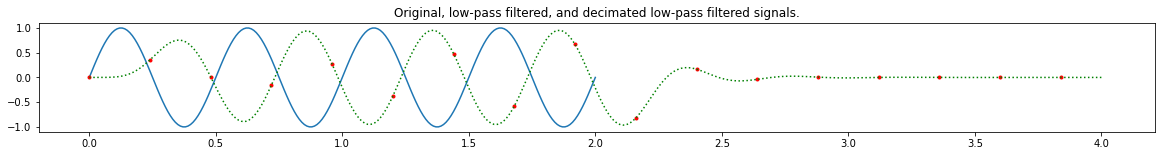

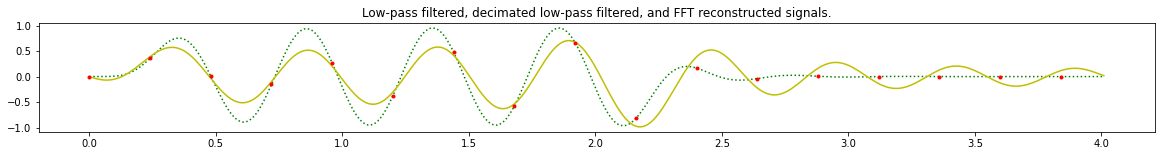

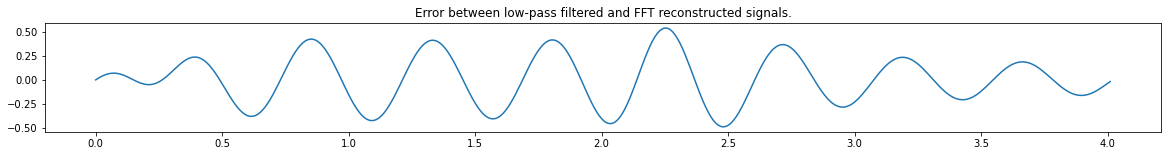

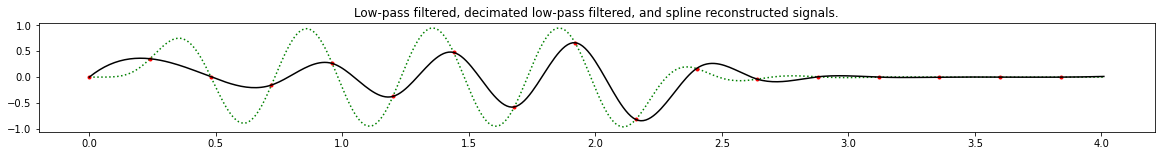

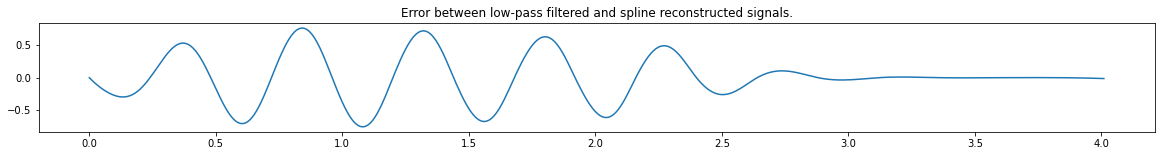

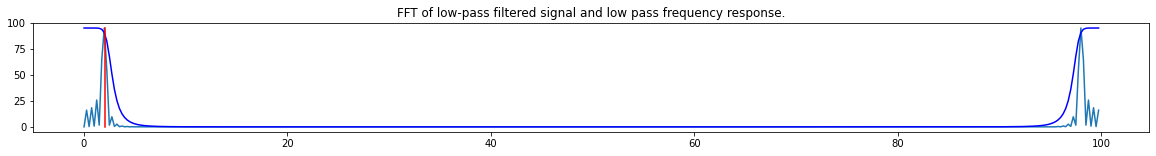

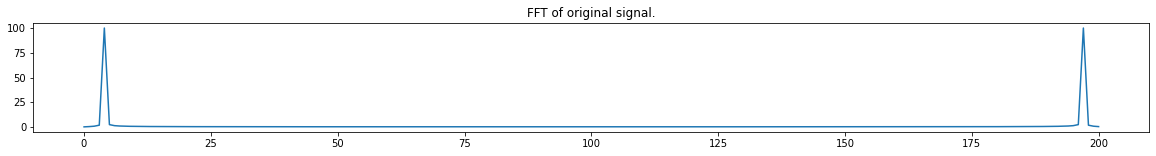

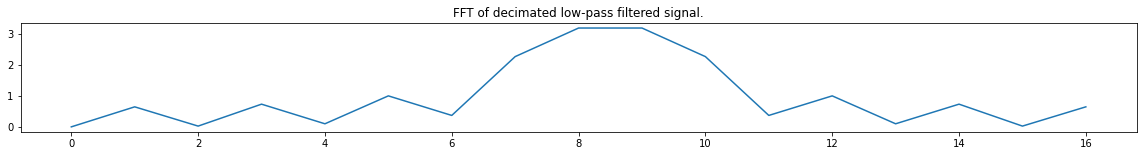

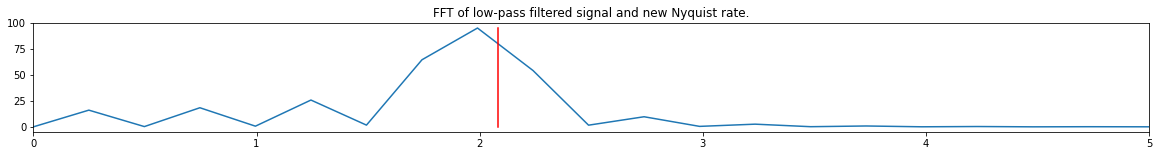

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d

T = 201
fs = 100
t = np.arange(T)/fs
t2 = np.arange(2*T)/fs
decimation_factor = 24

good_frequency = 2
# good_frequency = fs/decimation_factor/2-1/T
# good_frequency = fs*4/T
# good_frequency = fs/9/decimation_factor

x = np.sin(2*np.pi*good_frequency*t)

f_cutoff = 1.25*good_frequency
x_lp = butter_lowpass_filter(np.concatenate((x,np.zeros(T))), f_cutoff, fs)
h_lp = butter_lowpass(f_cutoff, fs)

x_decimated = x_lp[0:2*T:decimation_factor]
t_decimated = t2[0:2*T:decimation_factor]

fx = interp1d(t_decimated, x_decimated, fill_value="extrapolate", kind='cubic')

gain_factor = 5

plt.rcParams['figure.figsize'] = [20, 2]
figNo = 1
plt.figure(figNo)
plt.plot(t,x)
plt.plot(t_decimated, x_decimated, 'r.')
plt.plot(t2,x_lp, 'g:')
plt.title('Original, low-pass filtered, and decimated low-pass filtered signals.')

T_decimated = len(x_decimated)
T_decimated_on_2_plus_1 = int(T_decimated/2) +1

x_d_fft = np.fft.fft(gain_factor*x_decimated)
x_d_fft_padded = np.concatenate((x_d_fft[0:T_decimated_on_2_plus_1], 
                                 np.zeros(len(x_lp)-len(x_d_fft)), 
                                 x_d_fft[T_decimated_on_2_plus_1:T_decimated]))
x_interpolated = np.fft.ifft(gain_factor*x_d_fft_padded)

figNo = figNo + 1
plt.figure(figNo)
plt.plot(t2,x_lp, 'g:')
plt.plot(t2, np.real(x_interpolated),'y')
# plt.plot(t, np.imag(x_interpolated))
plt.plot(t_decimated, x_decimated, 'r.')
plt.title('Low-pass filtered, decimated low-pass filtered, and FFT reconstructed signals.')


figNo = figNo + 1
plt.figure(figNo)
plt.plot(t2,np.subtract(x_lp,np.real(x_interpolated)))
plt.title('Error between low-pass filtered and FFT reconstructed signals.')


figNo = figNo + 1
plt.figure(figNo)
plt.plot(t2,x_lp, 'g:')
plt.plot(t_decimated, x_decimated, 'r.')
plt.plot(t2, fx(t2),'k')
plt.title('Low-pass filtered, decimated low-pass filtered, and spline reconstructed signals.')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(t2,np.subtract(x_lp,np.real(fx(t2))))
plt.title('Error between low-pass filtered and spline reconstructed signals.')



w, h = sosfreqz(h_lp, worN=len(x_lp), whole=True)

figNo = figNo + 1
plt.figure(figNo)
plt.plot(0.5*fs*w/np.pi, np.abs(np.fft.fft(x_lp)))
plt.plot(0.5*fs*w/np.pi, np.abs(h)*np.max(np.abs(np.fft.fft(x_lp))), 'b')
plt.plot([fs/decimation_factor/2,fs/decimation_factor/2], [0,np.max(np.abs(np.fft.fft(x_lp)))],'r')
plt.title('FFT of low-pass filtered signal and low pass frequency response.')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(np.abs(np.fft.fft(x)))
plt.title('FFT of original signal.')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(np.abs(np.fft.fft(x_decimated)))
plt.title('FFT of decimated low-pass filtered signal.')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(0.5*fs*w/np.pi, np.abs(np.fft.fft(x_lp)))
# for image_no in np.arange(1,decimation_factor*4):
#     plt.plot(0.5*fs*w/np.pi-fs/decimation_factor/2*image_no, np.abs(np.fft.fft(x_lp)))
plt.plot([fs/decimation_factor/2,fs/decimation_factor/2], [0,np.max(np.abs(np.fft.fft(x_lp)))],'r')
plt.xlim([0,5])
plt.title('FFT of low-pass filtered signal and new Nyquist rate.')



Text(0.5, 1.0, 'FFT of decimated signal')

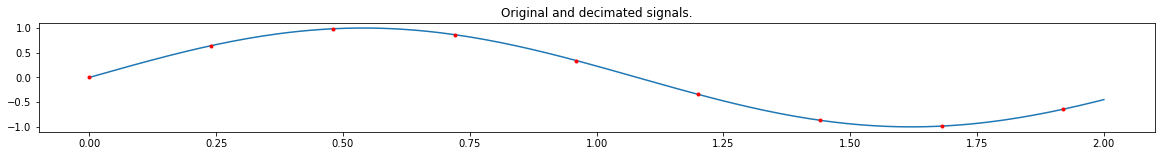

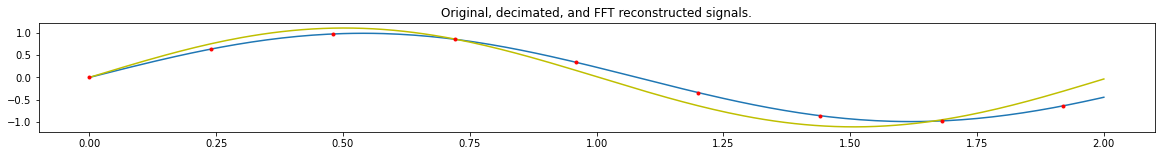

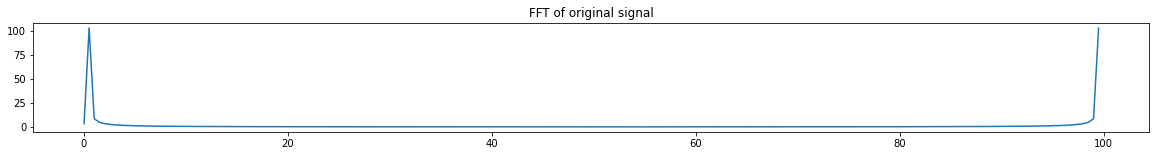

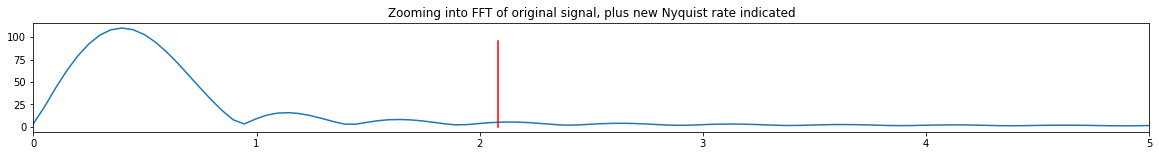

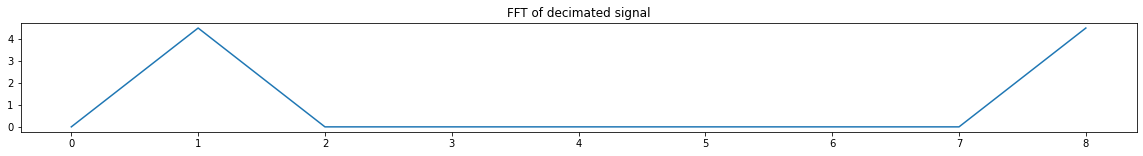

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d

T = 201
fs = 100
t = np.arange(T)/fs
t2 = np.arange(2*T)/fs
decimation_factor = 24

# good_frequency = fs*3/9/decimation_factor
# good_frequency = 2
good_frequency = fs/9/decimation_factor

x = np.sin(2*np.pi*good_frequency*t)

x_decimated = x[0:T:decimation_factor]
t_decimated = t[0:T:decimation_factor]

plt.rcParams['figure.figsize'] = [20, 2]
figNo = 1
plt.figure(figNo)
plt.plot(t,x)
plt.plot(t_decimated, x_decimated, 'r.')
plt.title('Original and decimated signals.')

T_decimated = len(x_decimated)
T_decimated_on_2_plus_1 = int(T_decimated/2) +1

x_d_fft = np.fft.fft(gain_factor*x_decimated)
x_d_fft_padded = np.concatenate((x_d_fft[0:T_decimated_on_2_plus_1], 
                                 np.zeros(len(x)-len(x_d_fft)), 
                                 x_d_fft[T_decimated_on_2_plus_1:T_decimated]))
x_interpolated = np.fft.ifft(gain_factor*x_d_fft_padded)

wz, xz = freqz(x, [1], worN=len(x), whole=True, fs=fs)

figNo = figNo + 1
plt.figure(figNo)
plt.plot(t,x)
plt.plot(t, np.real(x_interpolated),'y')
plt.plot(t_decimated, x_decimated, 'r.')
plt.title('Original, decimated, and FFT reconstructed signals.')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(wz,np.abs(np.fft.fft(x)))
plt.title('FFT of original signal')

wz2, xz2 = freqz(x, [1], worN=len(x)*10, whole=True, fs=fs)
figNo = figNo + 1
plt.figure(figNo)
plt.plot(wz2,np.abs(xz2))
plt.plot([fs/decimation_factor/2,fs/decimation_factor/2], [0,np.max(np.abs(np.fft.fft(x_lp)))],'r')
plt.xlim([0,5])
plt.title('Zooming into FFT of original signal, plus new Nyquist rate indicated')

figNo = figNo + 1
plt.figure(figNo)
plt.plot(np.abs(np.fft.fft(x_decimated)))
plt.title('FFT of decimated signal')



In [112]:
good_frequency

1.8518518518518519

In [177]:
def force_low_pass(x, decimation_factor):
    T = len(x)
    x_fft = np.fft.fft(x,10*T);
    k_pass = int(np.floor(10*T/decimation_factor/2))
    x_fft[(k_pass+1):(10*T-k_pass)] = 0
    x_lp = np.real(np.fft.ifft(x_fft))
    return x_lp[0:T]

def decimate_and_interpolate(x, decimation_factor):
    T = len(x)
    x_low_pass = force_low_pass(x,decimation_factor)
    x_decimated = x[0:T:decimation_factor]
    T_decimated = len(x_decimated)
    T_decimated_on_2_plus_1 = int(T_decimated/2) +1

    x_d_fft = np.fft.fft(x_decimated)
    x_d_fft_padded = np.concatenate((x_d_fft[0:T_decimated_on_2_plus_1], 
                                 np.zeros(len(x)-len(x_d_fft)), 
                                 x_d_fft[T_decimated_on_2_plus_1:T_decimated]))
    x_interpolated = np.real(np.fft.ifft(gain_factor*x_d_fft_padded))
    
    return x_interpolated


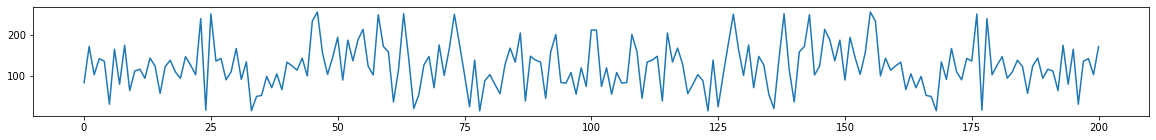

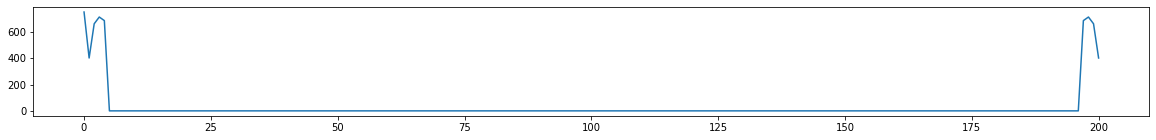

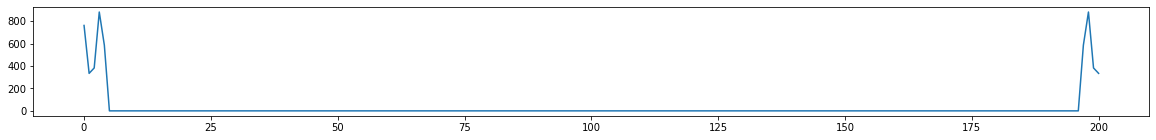

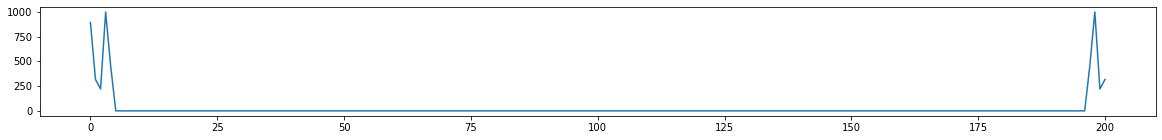

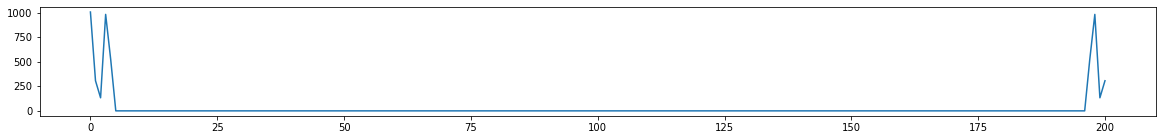

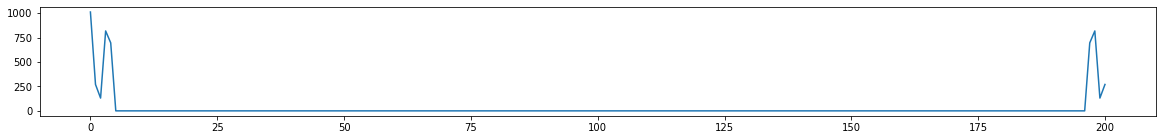

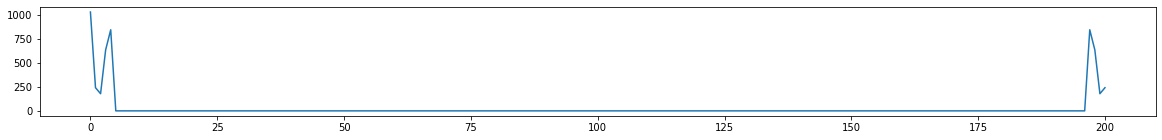

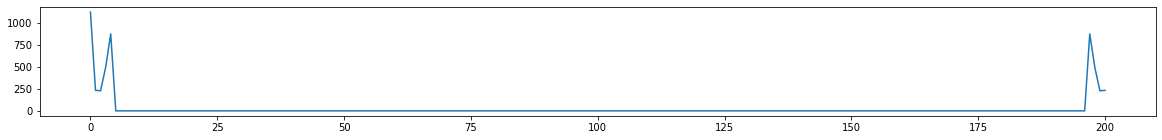

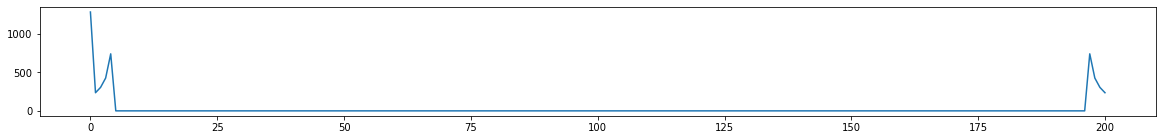

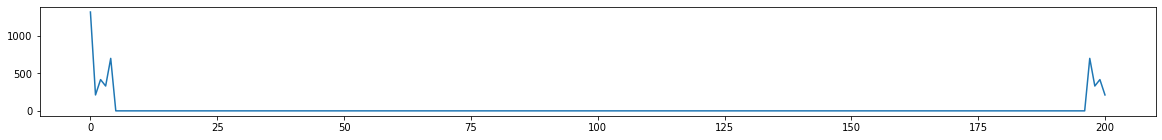

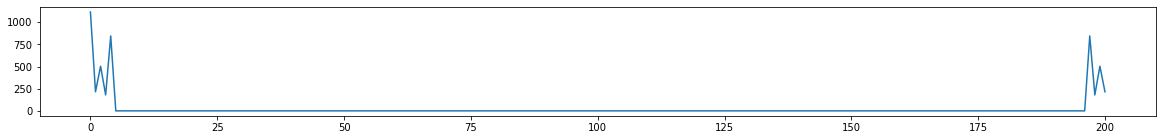

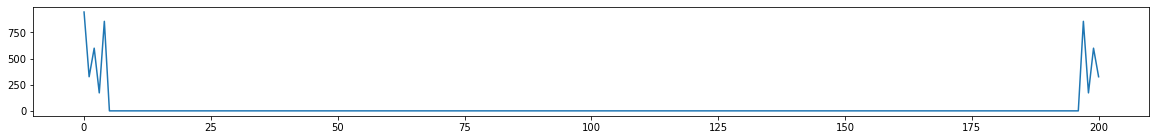

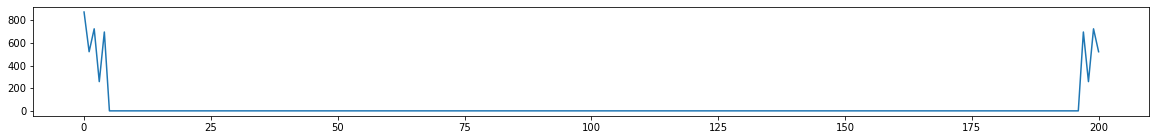

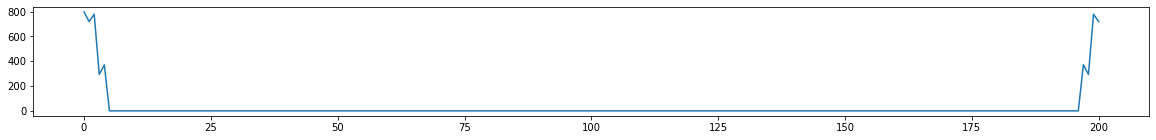

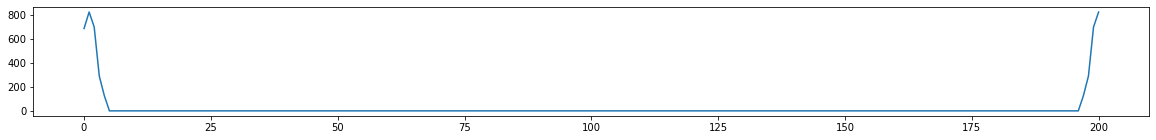

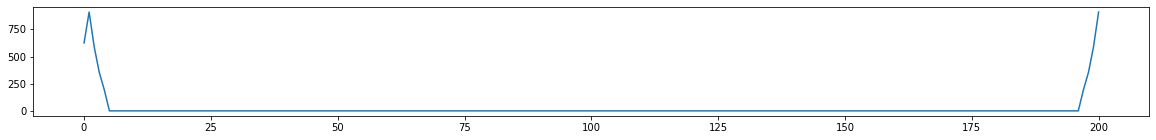

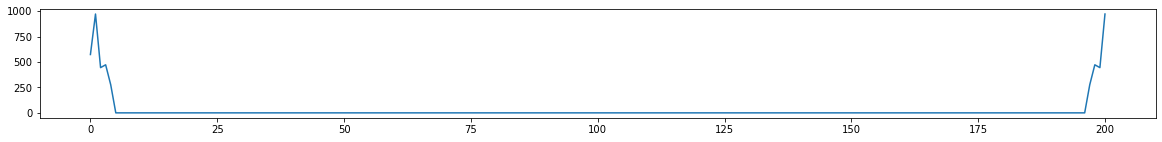

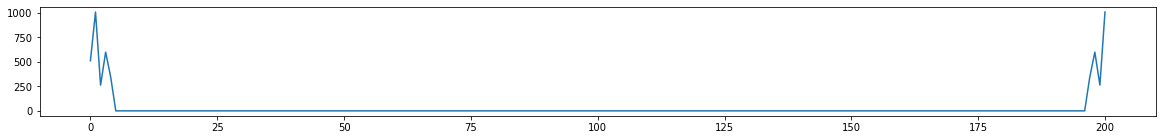

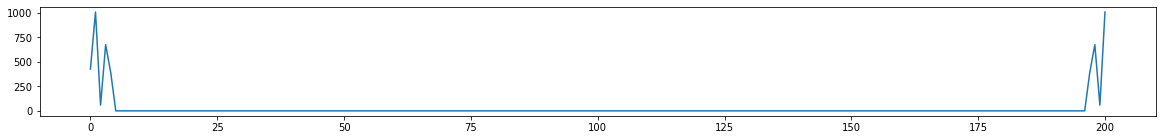

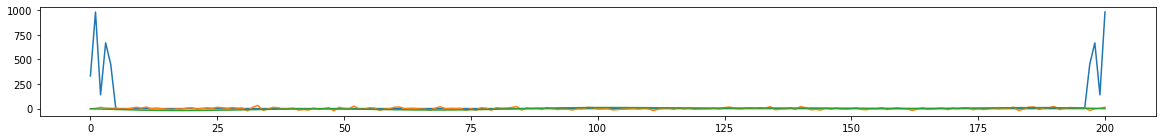

In [185]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d

T = 201
fs = 100
t = np.arange(T)/fs
t2 = np.arange(2*T)/fs
decimation_factor = 24

# good_frequency = fs*3/9/decimation_factor
good_frequency = 2
# good_frequency = fs/9/decimation_factor

# x = np.cos(2*np.pi*good_frequency*t)
x = np.random.normal(0,10,T)
x_iteration = x
figNo = 1
for iteration in np.arange(20):
#    if (iteration % 100 == 0):
    plt.figure(figNo)
    plt.plot(np.abs(np.fft.fft(x_iteration)))
    figNo = figNo + 1
    x_next = decimate_and_interpolate(x_iteration, decimation_factor)
    x_iteration = x_next*np.sum(np.abs(x_iteration))/np.sum(np.abs(x_next))
    
plt.plot(x)
plt.plot(x_iteration)

In [175]:
T = len(x)
x_fft = np.fft.fft(x,10*T);
k_pass = int(np.floor(10*T/decimation_factor/2))
x_fft[(k_pass+1):(10*T-k_pass)] = 0
x_lp = np.real(np.fft.ifft(x_fft))


In [187]:
print(np.arange(0,201,24))

[  0  24  48  72  96 120 144 168 192]


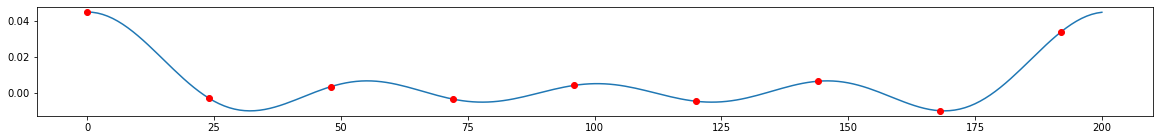

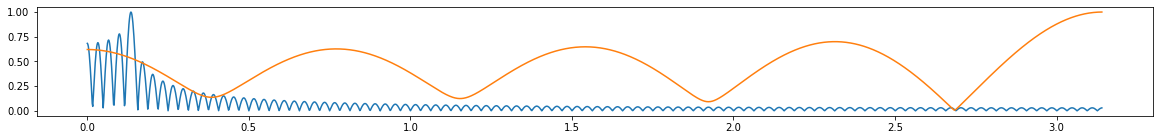

In [206]:
XXX = np.zeros(201)
XXX[0:5] = 1
XXX[197:202] = 1
xxx = np.real(np.fft.ifft(XXX))
subsamples = np.arange(0,201,24)
xxx_decimated = xxx[subsamples]

plt.figure(1)
plt.plot(xxx)
plt.plot(subsamples, xxx_decimated, 'ro')

w,hxxx = signal.freqz(xxx,1,worN=2048)
w,hxxx_decimated = signal.freqz(xxx_decimated,1,worN=2048)

plt.figure(2)
plt.plot(w,np.abs(hxxx)/max(np.abs(hxxx)))
plt.plot(w,np.abs(hxxx_decimated)/max(np.abs(hxxx_decimated)))


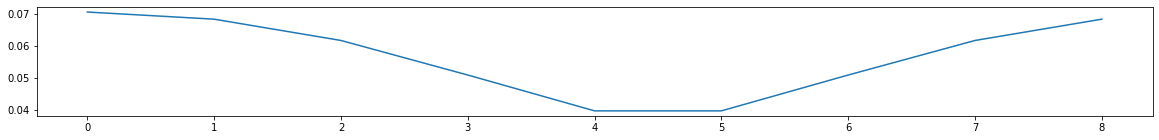

In [197]:
plt.plot(np.abs(np.fft.fft(xxx[np.arange(0,201,24)])))

In [210]:
decimation_matrix = np.zeros([201,201])
for idx in np.arange(0,201,24):
    decimation_matrix[idx,idx] = 1

inverse_decimation_matrix = np.linalg.pinv(decimation_matrix)

In [213]:
u,s,vh = np.linalg.svd(decimation_matrix)

In [214]:
s

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
      